In [2]:
import pandas as pd
import json
from pathlib import Path
import sys
import os
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
sys.path.insert(1, os.path.abspath( os.path.dirname("../classes")) )

from classes.model_parameters import StochasticParameters
from classes.facility_parameters import FacilityParameters

In [4]:
data_path = Path(os.path.abspath("")).parent.parent.parent.joinpath("data")

In [5]:
with open(data_path.joinpath("parameters").joinpath("parameters.json"), "r") as f:
    parameters_json_stoch = json.load(f)

with open(data_path.joinpath("facility").joinpath("parameters.json"), "r") as f:
    parameters_json_fac = json.load(f)

gas_forward_curve = pd.read_csv(data_path.joinpath("forward-curve").joinpath("gas-forward-hourly.csv"))
power_forward_curve = pd.read_csv(data_path.joinpath("forward-curve").joinpath("power-forward-hourly.csv"))
parameters = StochasticParameters.from_dict(parameters_json_stoch)
facility_parameters = list(map(lambda d: FacilityParameters.from_dict(d), parameters_json_fac))

g_0 = gas_forward_curve["price"][0]
p_0 = power_forward_curve["price"][0]

In [6]:
HOURS_PER_YEAR = gas_forward_curve.index.size
dt = 1 / HOURS_PER_YEAR
dt

0.00011415525114155251

In [7]:
import tolling_agreement_valuation

model_parameter_path = data_path.joinpath("parameters").joinpath("parameters.json")
unit_parameters_path = data_path.joinpath("facility").joinpath("parameters.json")
gas_curve_path = data_path.joinpath("forward-curve").joinpath("gas-forward-hourly.csv")
power_curve_path = data_path.joinpath("forward-curve").joinpath("power-forward-hourly.csv")

In [ ]:
prices = tolling_agreement_valuation.sample_prices(
    str(gas_curve_path.absolute()),
    str(power_curve_path.absolute()),
    str(model_parameter_path.absolute()),
    100_000
)

NameError: name 'tolling_agreement_valuation' is not defined

In [ ]:
g_paths, p_paths = prices[0], prices[1]

In [ ]:
np.max(g_paths)

np.float64(12.53069014790238)

In [ ]:
plt.style.use('seaborn-v0_8-darkgrid')

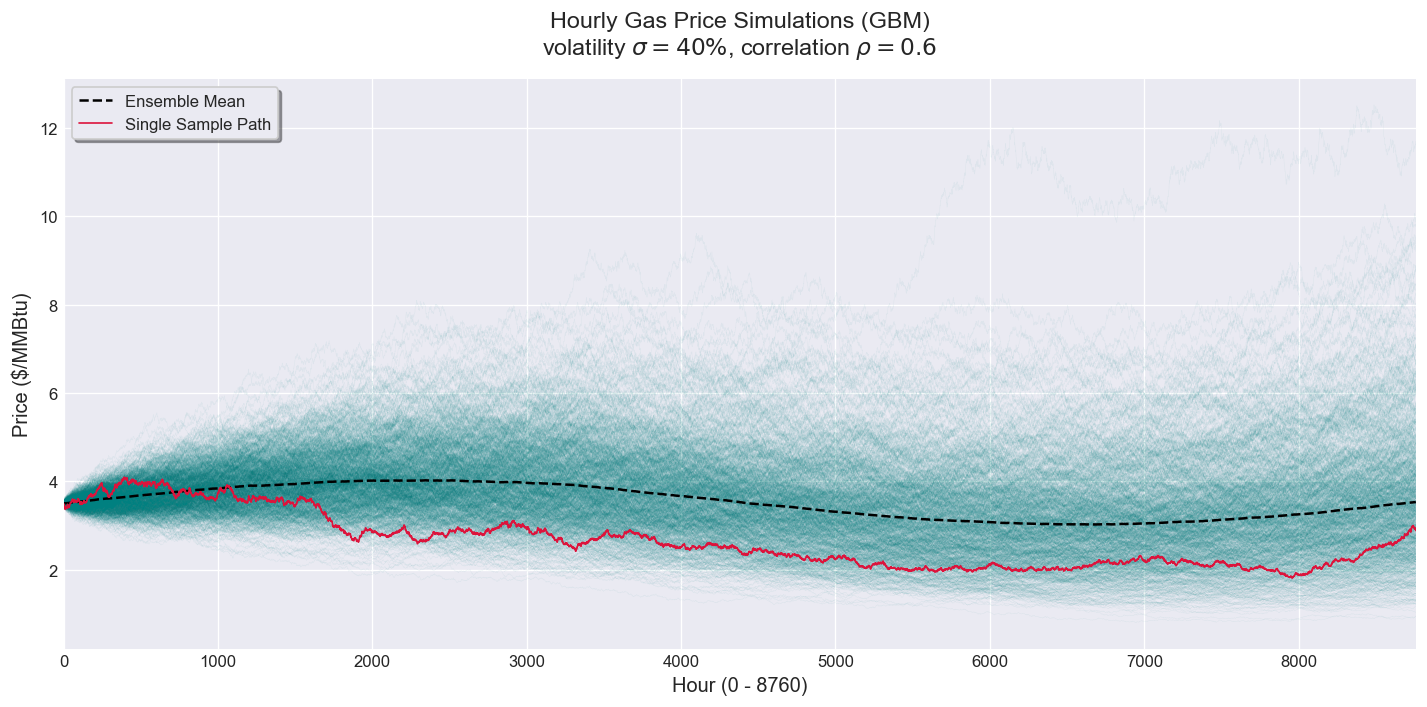

In [ ]:
plt.figure(figsize=(12, 6), dpi=120)

# Background cloud
plt.plot(g_paths.T, color='teal', alpha=0.05, linewidth=0.3)

# Mean path
plt.plot(np.mean(g_paths, axis=0), color='black', linewidth=1.5, linestyle='--', label='Ensemble Mean')

# Single sample
plt.plot(g_paths[0, :], color='crimson', linewidth=1.0, label='Single Sample Path')

plt.title("Hourly Gas Price Simulations (GBM)\nvolatility $\\sigma=40\\%$, correlation $\\rho=0.6$", fontsize=14, pad=15)
plt.ylabel("Price ($/MMBtu)", fontsize=12)
plt.xlabel("Hour (0 - 8760)", fontsize=12)
plt.legend(loc='upper left', frameon=True, framealpha=1, shadow=True)
plt.xlim(0, HOURS_PER_YEAR)

plt.tight_layout()
plt.show()

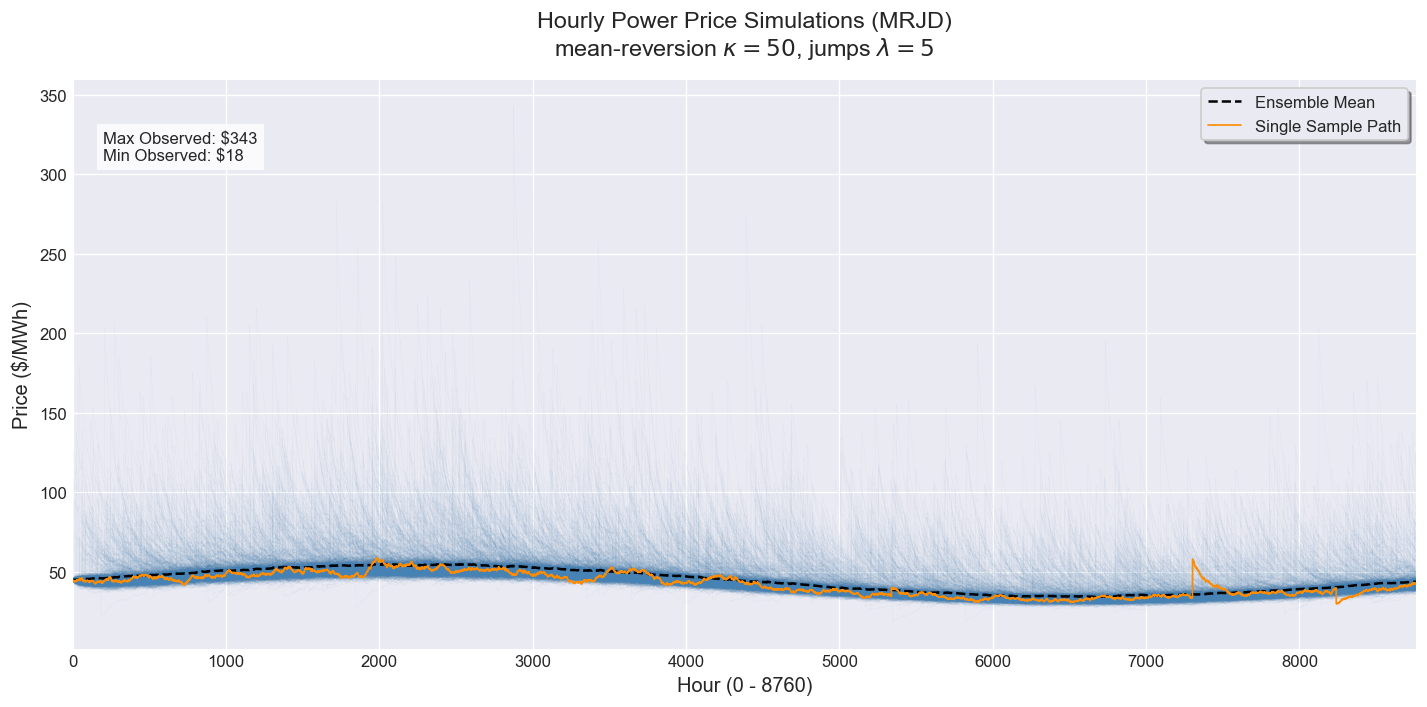

In [ ]:
plt.figure(figsize=(12, 6), dpi=120)

plt.plot(p_paths.T, color='steelblue', alpha=0.05, linewidth=0.3)

# Plot the Mean (Forward Curve check)
plt.plot(np.mean(p_paths, axis=0), color='black', linewidth=1.5, linestyle='--', label='Ensemble Mean')

# Plot one single realization
plt.plot(p_paths[0, :], color='darkorange', linewidth=1.0, label='Single Sample Path')

plt.title("Hourly Power Price Simulations (MRJD)\nmean-reversion $\\kappa=50$, jumps $\\lambda=5$", fontsize=14, pad=15)
plt.ylabel("Price ($/MWh)", fontsize=12)
plt.xlabel("Hour (0 - 8760)", fontsize=12)
plt.legend(loc='upper right', frameon=True, framealpha=1, shadow=True)
plt.xlim(0, HOURS_PER_YEAR)

# Add stats box
plt.text(200, np.max(p_paths)*0.9, 
         f"Max Observed: ${np.max(p_paths):.0f}\nMin Observed: ${np.min(p_paths):.0f}", 
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()
plt.show()